In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader2, Dataset
from torchvision import datasets, transforms
import pandas as pd
from torchinfo import summary
import numpy as np
from skimage.transform import resize
from skimage.color import gray2rgb
from sklearn.model_selection import train_test_split

C:\Users\Kiril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=pd.read_csv(r"C:\Users\Kiril\projects\TORCHI\data\emotions\ckextended.csv")

In [3]:
data

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training
...,...,...,...
915,5,87 86 88 92 92 127 231 248 251 253 254 254 254...,PrivateTest
916,5,21 24 26 28 27 28 30 8 0 0 0 0 0 0 1 4 37 42 4...,PrivateTest
917,5,76 40 31 38 28 34 38 36 41 36 46 38 44 26 45 5...,PrivateTest
918,5,114 87 16 29 17 25 30 34 37 35 45 93 63 80 73 ...,PrivateTest


In [4]:
data.drop(columns=["Usage"])

,emotion,pixels
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...
...,...,...
915,5,87 86 88 92 92 127 231 248 251 253 254 254 254...
916,5,21 24 26 28 27 28 30 8 0 0 0 0 0 0 1 4 37 42 4...
917,5,76 40 31 38 28 34 38 36 41 36 46 38 44 26 45 5...
918,5,114 87 16 29 17 25 30 34 37 35 45 93 63 80 73 ...


In [5]:
class_names=data["emotion"].unique()
class_names=np.sort(class_names)

In [6]:
class_names

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [7]:
class_names_encoded=["Anger","Disgust","Fear","Happiness","Sadness","Surprice","Neutral","Contempt"]

In [8]:
data["img_reshaped"]=data["pixels"].apply(lambda x: np.reshape(x.split(' '),(48,48)).astype(np.float32))
data["img_processed"]=data["img_reshaped"].apply(lambda x: resize(gray2rgb(x/256), (224,224)))


In [9]:
data["img_processed"][0].shape

(224, 224, 3)

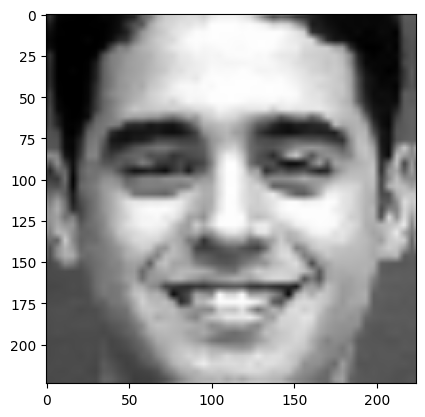

In [10]:
plt.imshow(data['img_processed'][623])

In [11]:
class img_dataset(Dataset):
    def __init__(self,X,Y):
        self.x=X
        self.y=Y
        self.n_samples=len(X)
    def __getitem__(self, index):
        transform = transforms.Compose([transforms.ToTensor()])
        return transform(self.x[index]), torch.tensor(self.y[index], dtype=torch.int64)
    def __len__(self):
        return self.n_samples

In [12]:
X=data["img_processed"].to_numpy()
Y=data["emotion"].to_numpy()
X,Y

(array([array([[[0.1452836 , 0.1452836 , 0.1452836 ],
                [0.14441666, 0.14441666, 0.14441666],
                [0.14383869, 0.14383869, 0.14383869],
                ...,
                [0.13166155, 0.13166155, 0.13166155],
                [0.13096401, 0.13096401, 0.13096401],
                [0.1299177 , 0.1299177 , 0.1299177 ]],
 
               [[0.1452537 , 0.1452537 , 0.1452537 ],
                [0.14348991, 0.14348991, 0.14348991],
                [0.14231406, 0.14231406, 0.14231406],
                ...,
                [0.10382952, 0.10382952, 0.10382952],
                [0.10899135, 0.10899135, 0.10899135],
                [0.11673409, 0.11673409, 0.11673409]],
 
               [[0.14523378, 0.14523378, 0.14523378],
                [0.1428721 , 0.1428721 , 0.1428721 ],
                [0.14129764, 0.14129764, 0.14129764],
                ...,
                [0.08527483, 0.08527483, 0.08527483],
                [0.09434291, 0.09434291, 0.09434291],
             

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2023)

In [14]:
train_dataset=img_dataset(X_train,Y_train)
test_dataset=img_dataset(X_test,Y_test)

In [15]:
train_dataloader=DataLoader2(train_dataset,batch_size=32,shuffle=True)
test_dataloader=DataLoader2(test_dataset,batch_size=32,shuffle=False)

In [16]:
img,labels=next(iter(train_dataloader))
img.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [17]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
weights=torchvision.models.VGG16_Weights.DEFAULT

In [19]:
auto_transforms=weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [20]:
model=torchvision.models.vgg16(weights=weights).to(device)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [21]:
for param in model.features.parameters():
    param.requires_grad = False

In [22]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape=len(class_names)

model.classifier=torch.nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=len(class_names), bias=True)
).to(device)

In [23]:
summary(model, input_size=(32,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [32, 8]                   --
├─Sequential: 1-1                        [32, 512, 7, 7]           --
│    └─Conv2d: 2-1                       [32, 64, 224, 224]        (1,792)
│    └─ReLU: 2-2                         [32, 64, 224, 224]        --
│    └─Conv2d: 2-3                       [32, 64, 224, 224]        (36,928)
│    └─ReLU: 2-4                         [32, 64, 224, 224]        --
│    └─MaxPool2d: 2-5                    [32, 64, 112, 112]        --
│    └─Conv2d: 2-6                       [32, 128, 112, 112]       (73,856)
│    └─ReLU: 2-7                         [32, 128, 112, 112]       --
│    └─Conv2d: 2-8                       [32, 128, 112, 112]       (147,584)
│    └─ReLU: 2-9                         [32, 128, 112, 112]       --
│    └─MaxPool2d: 2-10                   [32, 128, 56, 56]         --
│    └─Conv2d: 2-11                      [32, 256, 56, 56]   

In [24]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [25]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    model.eval() 
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
    
            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [26]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int):
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [27]:
model_results=train(model,train_dataloader,test_dataloader,optimizer,loss_fn,24)

  4%|▍         | 1/24 [00:05<02:03,  5.38s/it]

Epoch: 1 | train_loss: 2.1904 | train_acc: 0.5910 | test_loss: 0.8602 | test_acc: 0.7326


  8%|▊         | 2/24 [00:10<01:55,  5.24s/it]

Epoch: 2 | train_loss: 0.6306 | train_acc: 0.8084 | test_loss: 0.5927 | test_acc: 0.8212


 12%|█▎        | 3/24 [00:15<01:48,  5.19s/it]

Epoch: 3 | train_loss: 0.4835 | train_acc: 0.8505 | test_loss: 0.6935 | test_acc: 0.7656


 17%|█▋        | 4/24 [00:20<01:43,  5.16s/it]

Epoch: 4 | train_loss: 0.4171 | train_acc: 0.8736 | test_loss: 0.5117 | test_acc: 0.8368


 21%|██        | 5/24 [00:25<01:37,  5.15s/it]

Epoch: 5 | train_loss: 0.3180 | train_acc: 0.9076 | test_loss: 0.5385 | test_acc: 0.8472


 25%|██▌       | 6/24 [00:31<01:32,  5.14s/it]

Epoch: 6 | train_loss: 0.3392 | train_acc: 0.9171 | test_loss: 0.5930 | test_acc: 0.8385


 29%|██▉       | 7/24 [00:36<01:27,  5.15s/it]

Epoch: 7 | train_loss: 0.2238 | train_acc: 0.9361 | test_loss: 0.7511 | test_acc: 0.8385


 33%|███▎      | 8/24 [00:41<01:22,  5.15s/it]

Epoch: 8 | train_loss: 0.2229 | train_acc: 0.9579 | test_loss: 0.5105 | test_acc: 0.8750


 38%|███▊      | 9/24 [00:46<01:17,  5.14s/it]

Epoch: 9 | train_loss: 0.1875 | train_acc: 0.9470 | test_loss: 0.7109 | test_acc: 0.8403


 42%|████▏     | 10/24 [00:51<01:12,  5.15s/it]

Epoch: 10 | train_loss: 0.1528 | train_acc: 0.9579 | test_loss: 0.8864 | test_acc: 0.8333


 46%|████▌     | 11/24 [00:56<01:06,  5.15s/it]

Epoch: 11 | train_loss: 0.2277 | train_acc: 0.9389 | test_loss: 0.7354 | test_acc: 0.8663


 50%|█████     | 12/24 [01:01<01:01,  5.15s/it]

Epoch: 12 | train_loss: 0.1856 | train_acc: 0.9470 | test_loss: 0.6439 | test_acc: 0.8507


 54%|█████▍    | 13/24 [01:07<00:56,  5.15s/it]

Epoch: 13 | train_loss: 0.3585 | train_acc: 0.9334 | test_loss: 0.7414 | test_acc: 0.8299


 58%|█████▊    | 14/24 [01:12<00:51,  5.16s/it]

Epoch: 14 | train_loss: 0.2825 | train_acc: 0.9416 | test_loss: 0.6504 | test_acc: 0.8594


 62%|██████▎   | 15/24 [01:17<00:46,  5.16s/it]

Epoch: 15 | train_loss: 0.2337 | train_acc: 0.9443 | test_loss: 0.6361 | test_acc: 0.8646


 67%|██████▋   | 16/24 [01:22<00:41,  5.16s/it]

Epoch: 16 | train_loss: 0.2456 | train_acc: 0.9484 | test_loss: 0.7464 | test_acc: 0.8438


 71%|███████   | 17/24 [01:27<00:36,  5.17s/it]

Epoch: 17 | train_loss: 0.3334 | train_acc: 0.9361 | test_loss: 0.8362 | test_acc: 0.8681


 75%|███████▌  | 18/24 [01:32<00:31,  5.17s/it]

Epoch: 18 | train_loss: 0.2847 | train_acc: 0.9511 | test_loss: 0.5726 | test_acc: 0.8750


 79%|███████▉  | 19/24 [01:38<00:26,  5.31s/it]

Epoch: 19 | train_loss: 0.2011 | train_acc: 0.9538 | test_loss: 0.9420 | test_acc: 0.8819


 83%|████████▎ | 20/24 [01:44<00:22,  5.56s/it]

Epoch: 20 | train_loss: 0.2020 | train_acc: 0.9592 | test_loss: 0.5977 | test_acc: 0.8941


 88%|████████▊ | 21/24 [01:50<00:17,  5.77s/it]

Epoch: 21 | train_loss: 0.1897 | train_acc: 0.9565 | test_loss: 0.7816 | test_acc: 0.8872


 92%|█████████▏| 22/24 [01:57<00:11,  5.92s/it]

Epoch: 22 | train_loss: 0.1790 | train_acc: 0.9538 | test_loss: 0.8235 | test_acc: 0.8507


 96%|█████████▌| 23/24 [02:03<00:06,  6.04s/it]

Epoch: 23 | train_loss: 0.1682 | train_acc: 0.9606 | test_loss: 0.7337 | test_acc: 0.8663


100%|██████████| 24/24 [02:09<00:00,  5.41s/it]

Epoch: 24 | train_loss: 0.2475 | train_acc: 0.9552 | test_loss: 0.6201 | test_acc: 0.8924


In [28]:
def plot_loss_curves(results):
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

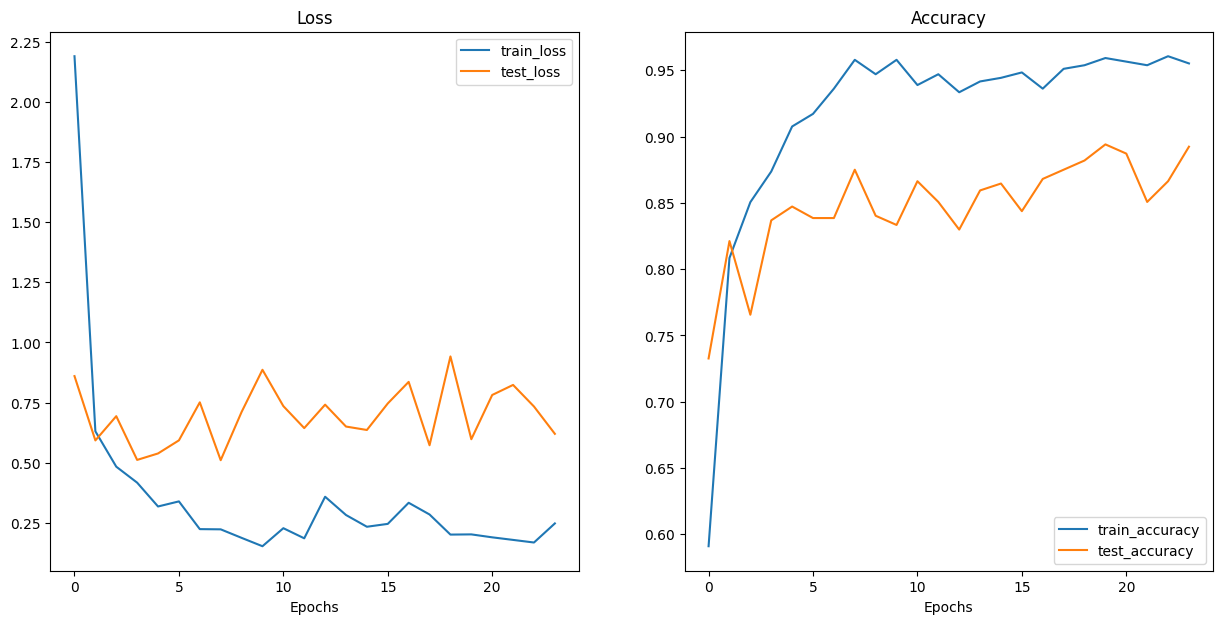

In [29]:
plot_loss_curves(model_results)

In [30]:
manual_transforms=transforms.Compose(
    [transforms.Resize((224,224)),]
)

In [31]:
from typing import List


def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    target_image = target_image / 255. 
    
    if transform:
        target_image = transform(target_image)
    
    model.to(device)
    
    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(dim=0)
    
        target_image_pred = model(target_image.to(device))
        
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    plt.imshow(target_image.squeeze().permute(1, 2, 0))
    
    title = f"Pred: {class_names_encoded[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"

    plt.title(title)
    plt.axis(False)

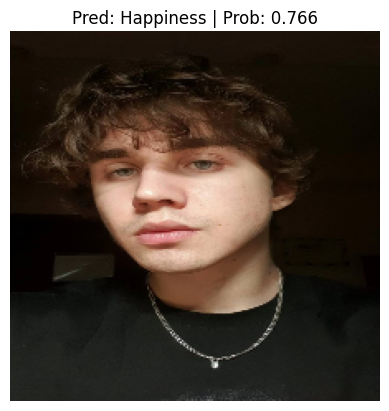

In [33]:
pred_and_plot_image(model,r"C:\Users\Kiril\projects\TORCHI\data\1.jpg",class_names,manual_transforms,device)